<div style='background-image: url("main.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px ; width: 100%'>
     <div style="float: right ; margin: 20px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , .8) ; line-height: 100%">Optique géométrique
            </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Relations de Descartes | Rayons lumineux, lentille hémisphérique et stigmatisme
             </div>
        </div>
    </div>
</div>

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib widget

# import des librairies 
import numpy as np
import matplotlib.pyplot as plt

# Modélisation physique du problème : lentille hémisphérique
On considère un rayon lumineux parvenant sur une lentille hémisphérique perpendiculairement à la face plane. Il est transmis sans déviation par cette face, jusqu'à arriver sur le dioptre hémisphérique, où le rayon incident forme un angle $i$ avec la normale.

## Lois de Descartes - condition d'émergence
Il subit donc les lois de Descartes, et sera transmis au milieu extérieur si l'angle $i$ est inférieur à $i_\text{max}=\arcsin\left(\frac{n_a}{n_v}\right)$ qui est l'angle de réflexion totale.

&nbsp;
Si on note $a$ la hauteur par rapport à l'axe optique à laquelle le rayon a été émis, la condition d'émergence du rayon lumineux pour cette lentille est donc : $$a<a_\text{max}=R\sin i=R\dfrac{n_a}{n_v}$$

&nbsp;
On déclare alors un ensemble de hauteurs comprises entre $[0,a_\text{max}[$ que l'on stocke dans l'array `a0`.

In [2]:
# Paramètres physiques décrivant la lentille hémisphérique
R = 10e-2 # rayon de courbure de la face bombée
nv = 1.6 # indice optique du verre utilisé
na = 1 # indice optique de l'air

# Paramètres décrivant les rayons lumineux entrant
a_max = R*na/nv # hauteur maximale conforme à la condition d'émergence
N = 10 # nombre de rayons lumineux tracés
a0 = np.linspace(-a_max,a_max,10) # array contenant les hauteurs initiales des rayons à tracer

## Tracé de la forme de la lentille hémisphérique
Il reste alors à tracer cette lentille et les rayons incidents en utilisant les fonctions de tracé paramétriques de `matplotlib` : on définit une variable `theta` qui prend ses valeurs entre $-\frac{\pi}{2}$ et $\frac{\pi}{2}$, et on l'utilise pour tracer un arc de cercle, c'est-à-dire l'ensemble des points $M$ vérifiant $x_M=R\cos\theta$ et $y_M=R\sin\theta$.

&nbsp;
On s'assure d'utiliser la commande `plt.axis('equal')` pour conserver un rapport d'aspect 1:1 entre les axes des abscisses et des ordonnées.

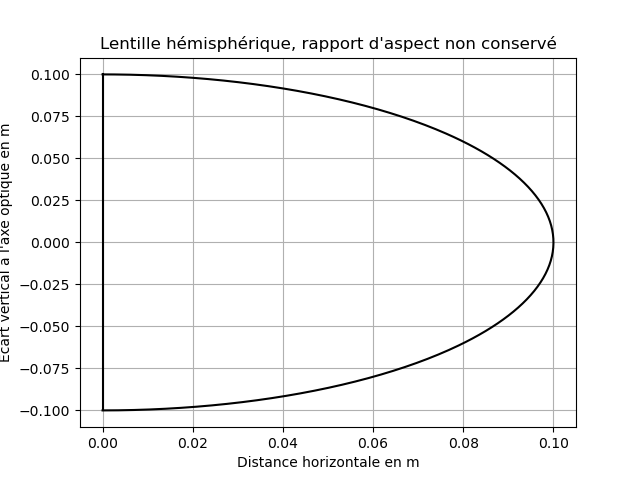

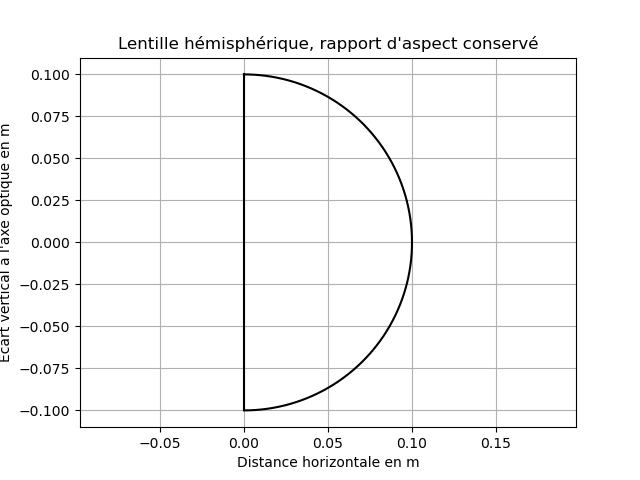

In [3]:
theta=np.linspace(-np.pi/2,np.pi/2,360)

plt.figure()
plt.title("Lentille hémisphérique, rapport d'aspect non conservé")
plt.plot([0,0],[R,-R],color='black') # Tracé de la face plane de la lentille
plt.plot(R*np.cos(theta),R*np.sin(theta), color='black') # Tracé de la face bombée de la lentille
plt.grid(True)
plt.xlabel("Distance horizontale en m")
plt.ylabel("Écart vertical à l'axe optique en m")
#plt.axis('equal') # permet de ne pas déformer la lentille lors d'un tracé par défaut
plt.show()

plt.figure()
plt.title("Lentille hémisphérique, rapport d'aspect conservé")
plt.plot([0,0],[R,-R],color='black') # Tracé de la face plane de la lentille
plt.plot(R*np.cos(theta),R*np.sin(theta), color='black') # Tracé de la face bombée de la lentille
plt.grid(True)
plt.xlabel("Distance horizontale en m")
plt.ylabel("Écart vertical à l'axe optique en m")
plt.axis('equal') # permet de ne pas déformer la lentille lors d'un tracé par défaut
plt.show()

## Intersection avec l'axe optique
Il reste alors à calculer le point d'intersection du rayon émergent avec l'axe optique. Un calcul de trigonométrie montre que ce point vérifie : 
$$CA'=R\cos i +\dfrac{R\sin i}{\tan(t-i)}$$

&nbsp;
où $i$ est l'angle d'incidence sur le dioptre tel que $\sin i =\frac{a}{R}$, $\cos i =\sqrt{1-\sin^2 i}=\sqrt{1-\frac{a^2}{R^2}}$ et $t$ est l'angle transmis donné par la loi de Descartes $n_v\sin i =n_a\sin t$.

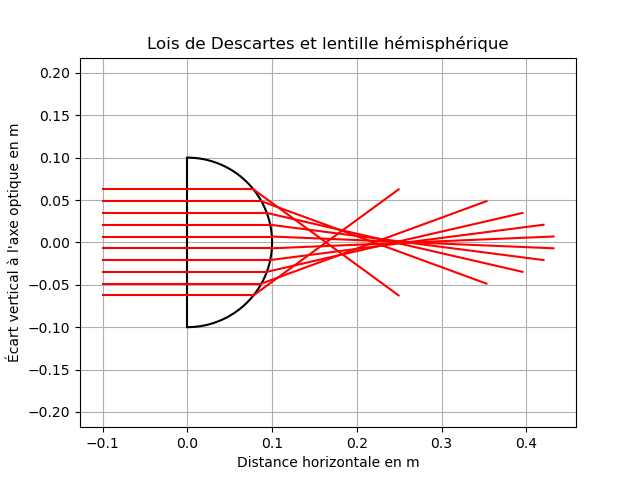

In [4]:
theta=np.linspace(-np.pi/2,np.pi/2,360)

plt.figure()
plt.title("Lois de Descartes et lentille hémisphérique")
plt.plot([0,0],[R,-R],color='black') # Tracé de la face plane de la lentille
plt.plot(R*np.cos(theta),R*np.sin(theta), color='black') # Tracé de la face bombée de la lentille
# Tracé des divers rayons lumineux
for a in a0 :
    plt.plot([-R,R*np.sqrt(1-(a/R)**2)],[a,a], color='red') # Partie avant la face bombée
    if a != 0 :
        plt.plot([R*np.sqrt(1-(a/R)**2), R*np.sqrt(1-(a/R)**2) + 2*a/np.arctan(np.arcsin(nv*a/(na*R))-np.arcsin(a/R))],[a,-a], color='red')
    else :
        plt.plot([R*np.sqrt(1-(a/R)**2), 4*R],[a,0], color='red') # On traite l'incidence nulle à part
plt.grid(True)
plt.xlabel("Distance horizontale en m")
plt.ylabel("Écart vertical à l'axe optique en m")
plt.axis('equal') # permet de ne pas déformer la lentille lors d'un tracé par défaut
plt.show()

On remarque que la lentille hémisphérique n'est pas stigmatique puisque l'image d'un objet à l'infini placé sur l'axe optique ne donne pas un unique point. Le foyer $F'$ n'est donc pas unique.

&nbsp;
On peut tracer les lieux d'intersection des rayons avec l'axe optique par rapport à une origine placée sur la face plane de la lentille.

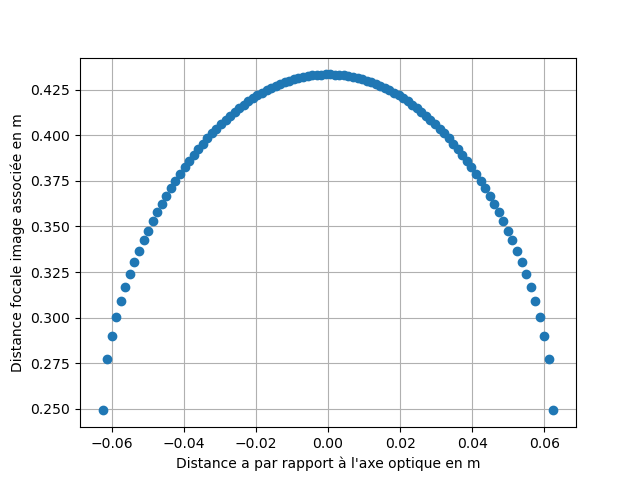

In [5]:
a0 = np.linspace(-a_max,a_max,100) # array contenant les hauteurs initiales des rayons à tracer

plt.figure()
plt.plot(a0, R*np.sqrt(1-(a0/R)**2) + 2*a0/np.arctan(np.arcsin(nv*a0/(na*R))-np.arcsin(a0/R)), 'o')
plt.xlabel("Distance a par rapport à l'axe optique en m")
plt.ylabel("Distance focale image associée en m")
plt.grid(True)
plt.show()

## Stigmatisme approché
On peut alors imposer un critère pour lequel on considère le stigmatisme comme approché, par exemple ne pas s'éloigner de plus de $\pm 10~\%$ de la valeur maximale du foyer, et déterminer la valeur de $a_\text{stig}$ qui vérifie ce critère :

In [6]:
f_max = np.max(R*np.sqrt(1-(a0/R)**2) + 2*a0/np.arctan(np.arcsin(nv*a0/(na*R))-np.arcsin(a0/R)))

f_ecart = (R*np.sqrt(1-(a0/R)**2) + 2*a0/np.arctan(np.arcsin(nv*a0/(na*R))-np.arcsin(a0/R))-f_max)/f_max

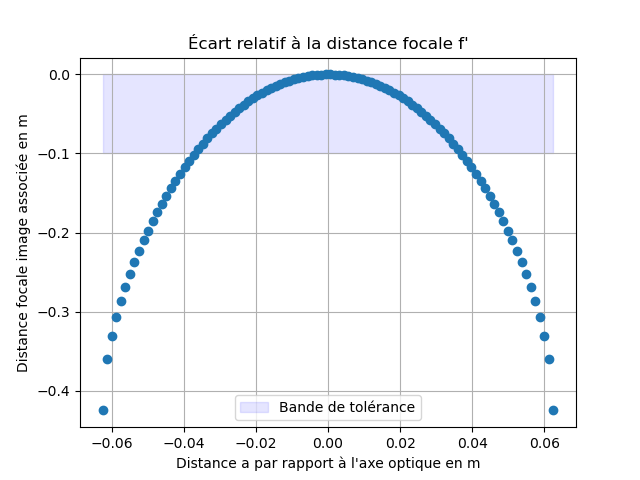

In [7]:
plt.figure()
plt.title("Écart relatif à la distance focale f\'")
plt.plot(a0,f_ecart,'o')
plt.fill_between([np.min(a0), np.max(a0)], y1 = -.1, y2 =0, color = 'blue', alpha = .1, label="Bande de tolérance")    # pour mieux visualiser le domaine des En acceptables
plt.grid(True)
plt.legend()
plt.xlabel("Distance a par rapport à l'axe optique en m")
plt.ylabel("Distance focale image associée en m")
plt.show()

On peut alors tracer les rayons qui correspondent à cette bande de tolérance pour vérifier la qualité de l'approximation.

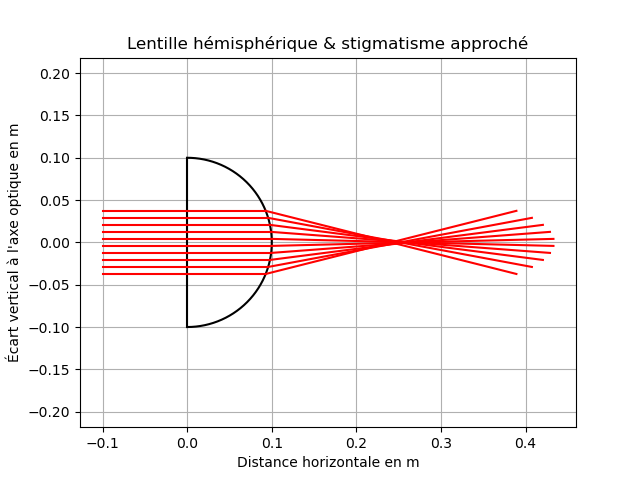

In [8]:
theta=np.linspace(-np.pi/2,np.pi/2,360)

plt.figure()
plt.title("Lentille hémisphérique & stigmatisme approché")
plt.plot([0,0],[R,-R],color='black') # Tracé de la face plane de la lentille
plt.plot(R*np.cos(theta),R*np.sin(theta), color='black') # Tracé de la face bombée de la lentille
# Tracé des divers rayons lumineux
a0=np.linspace(-.0373,.0373,10)
for a in a0 :
    plt.plot([-R,R*np.sqrt(1-(a/R)**2)],[a,a], color='red') # Partie avant la face bombée
    if a != 0 :
        plt.plot([R*np.sqrt(1-(a/R)**2), R*np.sqrt(1-(a/R)**2) + 2*a/np.arctan(np.arcsin(nv*a/(na*R))-np.arcsin(a/R))],[a,-a], color='red')
    else :
        plt.plot([R*np.sqrt(1-(a/R)**2), 4*R],[a,0], color='red') # On traite l'incidence nulle à part
plt.grid(True)
plt.axis('equal') # permet de ne pas déformer la lentille lors d'un tracé par défaut
plt.xlabel("Distance horizontale en m")
plt.ylabel("Écart vertical à l'axe optique en m")
plt.show()

## Aberration chromatique
### Loi de Sellmeier
Une fois ce critère établi, on peut également s'intéresser à l'effet de la longueur d'onde sur le stigmatisme en utilisant la loi de Sellmeier (<a href="https://fr.wikipedia.org/wiki/Équation_de_Sellmeier">doc.</a>) qui donne l'indice optique en fonction de $\lambda$ : 
    $$n^2=1+\dfrac{B_1\lambda^2}{\lambda^2-C_1}+\dfrac{B_2\lambda^2}{\lambda^2-C_2}+\dfrac{B_3\lambda^2}{\lambda^2-C_3}$$
    
&nbsp;
Avec $B_1=1,43134930$; $B_2=6,5054713\times 10^{-1}$; $B_3=5,3414021$; $C_1=5,2799261\times 10^{−15}~\text{m}^{-2}$; $C_2=1,42382647\times 10^{−15}~\text{m}^{-2}$ $C_3=3,25017834\times 10^{−15}~\text{m}^{-2}$.

&nbsp;
On code cette relation pour le verre en silice dans une fonction `indice(lambda)` où `lambda` est la valeur de la longueur d'onde.


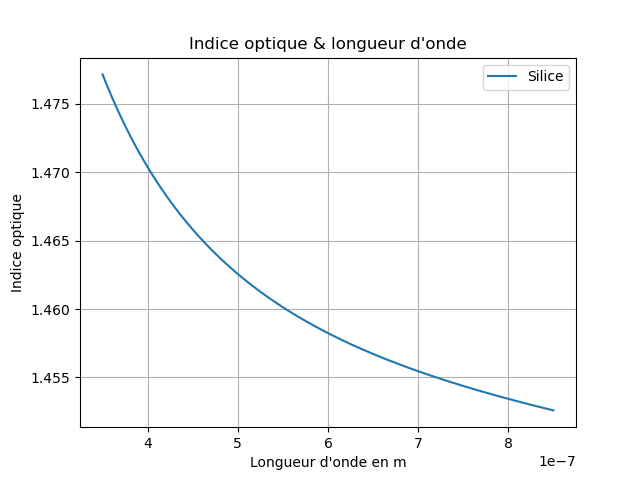

In [9]:
B1 = 0.696749
B2 = 0.408218
B3 = 0.890815
C1 = (0.0690660e-6)**2
C2 = (0.115662e-6)**2
C3 = (9.425478e-6)**2

def indice(l):
    return np.sqrt(1+B1*l**2/(l**2-C1)+B2*l**2/(l**2-C2)+B3*l**2/(l**2-C3))

lambda_lum=np.linspace(350e-9, 850e-9, 100)
plt.figure()
plt.title("Indice optique & longueur d'onde")
plt.plot(lambda_lum, indice(lambda_lum), label="Silice")
plt.xlabel("Longueur d'onde en m")
plt.ylabel("Indice optique")
plt.legend()
plt.grid(True)
plt.show()

## Aberration chromatique
On peut alors reprendre le tracé précédent en limitant les rayons pour ne pas surcharger le résultat et en considérant trois longueurs d'onde et les couleurs correspondantes.

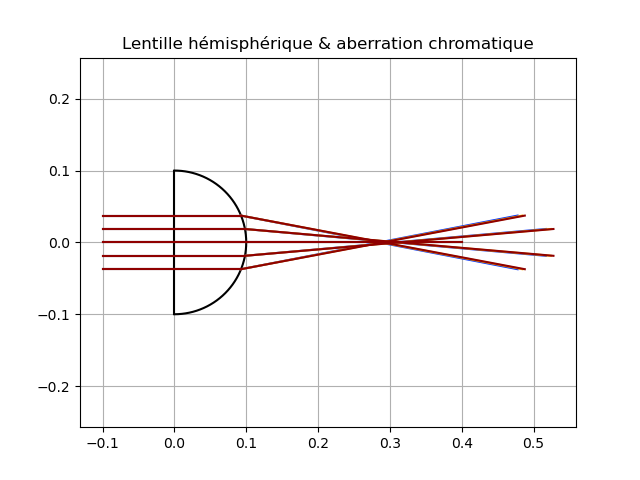

In [10]:

theta=np.linspace(-np.pi/2,np.pi/2,360)

plt.figure()
plt.title("Lentille hémisphérique & aberration chromatique")
plt.plot([0,0],[R,-R],color='black') # Tracé de la face plane de la lentille
plt.plot(R*np.cos(theta),R*np.sin(theta), color='black') # Tracé de la face bombée de la lentille

# Choix des longueurs d'onde
lambda_lum=[450e-9, 600e-9, 750e-9]
col=[(0,0.2,1), (1, 0.6923076923076923, 0), (0.5625,0,0)]

# Tracé des divers rayons lumineux
a0=np.linspace(-.0373,.0373,5)
for i in range(len(lambda_lum)) :
    for a in a0 :
        plt.plot([-R,R*np.sqrt(1-(a/R)**2)],[a,a], color=col[i]) # Partie avant la face bombée
        if a != 0 :
            plt.plot([R*np.sqrt(1-(a/R)**2), R*np.sqrt(1-(a/R)**2) + 2*a/np.arctan(np.arcsin(indice(lambda_lum[i])*a/(na*R))-np.arcsin(a/R))],[a,-a], color=col[i])
        else :
            plt.plot([R*np.sqrt(1-(a/R)**2), 4*R],[a,0], color=col[i]) # On traite l'incidence nulle à part
plt.grid(True)
plt.axis('equal') # permet de ne pas déformer la lentille lors d'un tracé par défaut
plt.show()